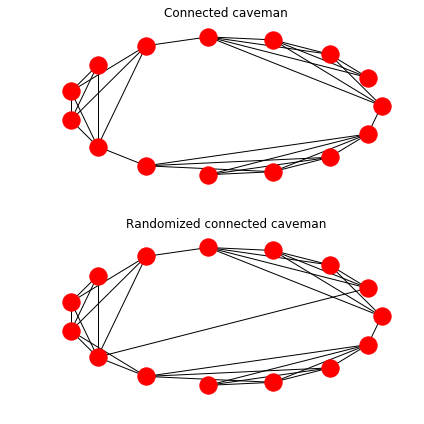

In [107]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # something with tight_layout and mpl


from copy import deepcopy

from macy import Network

cc = nx.connected_caveman_graph(3, 5)


net = Network(deepcopy(cc))
net.add_random_connections(0.02)

f, axes = plt.subplots(2, figsize=(6, 6))
axes[0].set_title('Connected caveman')
nx.draw_circular(cc, ax=axes[0])
axes[1].set_title('Randomized connected caveman')
nx.draw_circular(net.graph, ax=axes[1])

In [108]:
from collections import Counter
print('base: ', Counter([sum(1 for _ in nx.all_neighbors(cc, n)) for n in cc.nodes()]))
print('randomized: ', Counter([sum(1 for _ in nx.all_neighbors(net.graph, n)) for n in net.graph.nodes()]))

base:  Counter({4: 9, 3: 3, 5: 3})
randomized:  Counter({4: 8, 5: 4, 3: 2, 6: 1})


In [112]:
num_neighbors_base = [sum(1 for _ in nx.all_neighbors(cc, n)) for n in cc.nodes()]
num_neighbors_rand = [sum(1 for _ in nx.all_neighbors(net.graph, n)) for n in net.graph.nodes()]

print('base:', num_neighbors_base)
print('randomized:', num_neighbors_rand)
print(num_neighbors_base == deepcopy(num_neighbors_base))
print(num_neighbors_base == num_neighbors_rand)

base: [4, 3, 4, 4, 5, 4, 3, 4, 4, 5, 4, 3, 4, 4, 5]
randomized: [4, 4, 4, 4, 5, 4, 3, 4, 5, 6, 5, 3, 4, 4, 5]
True
False


In [114]:
edges = cc.edges()
print(edges)

[(0, 2), (0, 3), (0, 4), (0, 14), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (9, 10), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)]


In [131]:
import random

def get_swap_edges(edges):
    e1, e2 = random.sample(edges, 2)
    A, B = e1
    C, D = e2
    while A in e2 or B in e2:
        e1, e2 = random.sample(edges, 2)
        A, B = e1
        C, D = e2
    return e1, e2

def swap_edges(edges):
    assert len(edges) == 2, 'Must give exactly two edges in order to swap'
    
    
e1, e2 = get_swap_edges(cc.edges())

print('A, B:', e1)
print('C, D:', e2)

A, B: (7, 8)
C, D: (1, 2)


pre-swap edges: [(0, 2), (0, 8), (1, 2), (2, 3), (3, 5), (4, 5), (5, 6), (6, 8), (7, 8)]
post-swap edges:  [(0, 8), (0, 3), (1, 2), (2, 3), (2, 5), (4, 5), (5, 6), (6, 8), (7, 8)]


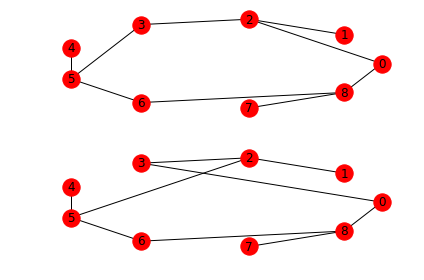

In [140]:
test_g = nx.connected_caveman_graph(3, 3)
base_edges = test_g.edges()
print('pre-swap edges:', base_edges)

f, axes = plt.subplots(2)
nx.draw_circular(test_g, ax=axes[0], with_labels=True)
e1 = (0, 2)
e2 = (3, 5)

test_g.remove_edge(*e1)
test_g.remove_edge(*e2)

new_e1 = (e1[0], e2[0])
new_e2 = (e1[1], e2[1])

test_g.add_edges_from([new_e1, new_e2])
nx.draw_circular(test_g, ax=axes[1], with_labels=True)
print('post-swap edges: ', test_g.edges())

In [143]:
l = [(1, 0), (0, 2), (4, 5)]
l.remove((1, 0))
print(l)

[(0, 2), (4, 5)]


In [145]:
type(round(2.2))

int

In [146]:
set([1, 2, 3]).difference([2, 3, 4])

{1}

In [147]:
[1, 2, 3] == [1, 2, 3]

True